In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings

In [22]:
# 设置绘图风格
sea.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [60]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei'是一种支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法正常显示的问题

In [23]:
nba_data = pd.read_csv("./data/all_seasons.csv")

nba_data.head(10)

Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   
5           5    Gerald Wilkins               ORL  33.0         198.12   
6           6  Gheorghe Muresan               WAS  26.0         231.14   
7           7         Glen Rice               CHH  30.0         203.20   
8           8    Glenn Robinson               MIL  24.0         200.66   
9           9        Grant Hill               DET  24.0         203.20   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   
5     102.058200  Tennessee-Chattanooga     USA       1985           2  ...   
6     137.438376                    NaN     USA       1993           2  ...   
7      99.790240               Michigan     USA       1989           1  ...   
8     106.594120                 Purdue     USA       1994           1  ...   
9     102.058200                   Duke     USA       1994           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   
5  10.6  2.2  2.2        -5.8     0.031     0.064    0.203   0.503    0.143   
6  10.6  6.6  0.4         6.9     0.098     0.217    0.185   0.618    0.024   
7  26.8  4.0  2.0         3.2     0.025     0.087    0.272   0.605    0.088   
8  21.1  6.3  3.1        -2.9     0.051     0.144    0.278   0.528    0.146   
9  21.4  9.0  7.3         6.9     0.049     0.232    0.283   0.556    0.356   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  
5  1996-97  
6  1996-97  
7  1996-97  
8  1996-97  
9  1996-97  

[10 rows x 22 columns]

In [24]:
nba_data.head(10)

Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   
5           5    Gerald Wilkins               ORL  33.0         198.12   
6           6  Gheorghe Muresan               WAS  26.0         231.14   
7           7         Glen Rice               CHH  30.0         203.20   
8           8    Glenn Robinson               MIL  24.0         200.66   
9           9        Grant Hill               DET  24.0         203.20   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   
5     102.058200  Tennessee-Chattanooga     USA       1985           2  ...   
6     137.438376                    NaN     USA       1993           2  ...   
7      99.790240               Michigan     USA       1989           1  ...   
8     106.594120                 Purdue     USA       1994           1  ...   
9     102.058200                   Duke     USA       1994           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   
5  10.6  2.2  2.2        -5.8     0.031     0.064    0.203   0.503    0.143   
6  10.6  6.6  0.4         6.9     0.098     0.217    0.185   0.618    0.024   
7  26.8  4.0  2.0         3.2     0.025     0.087    0.272   0.605    0.088   
8  21.1  6.3  3.1        -2.9     0.051     0.144    0.278   0.528    0.146   
9  21.4  9.0  7.3         6.9     0.049     0.232    0.283   0.556    0.356   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  
5  1996-97  
6  1996-97  
7  1996-97  
8  1996-97  
9  1996-97  

[10 rows x 22 columns]

In [25]:
nba_data.drop(columns='Unnamed: 0',inplace = True)

In [26]:
nba_data.head(10)

player_name team_abbreviation   age  player_height  player_weight  \
0  Randy Livingston               HOU  22.0         193.04      94.800728   
1  Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2      George Lynch               VAN  26.0         203.20     103.418976   
3    George McCloud               LAL  30.0         203.20     102.058200   
4      George Zidek               DEN  23.0         213.36     119.748288   
5    Gerald Wilkins               ORL  33.0         198.12     102.058200   
6  Gheorghe Muresan               WAS  26.0         231.14     137.438376   
7         Glen Rice               CHH  30.0         203.20      99.790240   
8    Glenn Robinson               MIL  24.0         200.66     106.594120   
9        Grant Hill               DET  24.0         203.20     102.058200   

                 college country draft_year draft_round draft_number  ...  \
0        Louisiana State     USA       1996           2           42  ...   
1  Northwestern Oklahoma     USA       1994           2           34  ...   
2         North Carolina     USA       1993           1           12  ...   
3          Florida State     USA       1989           1            7  ...   
4                   UCLA     USA       1995           1           22  ...   
5  Tennessee-Chattanooga     USA       1985           2           47  ...   
6                    NaN     USA       1993           2           30  ...   
7               Michigan     USA       1989           1            4  ...   
8                 Purdue     USA       1994           1            1  ...   
9                   Duke     USA       1994           1            3  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   
5  10.6  2.2  2.2        -5.8     0.031     0.064    0.203   0.503    0.143   
6  10.6  6.6  0.4         6.9     0.098     0.217    0.185   0.618    0.024   
7  26.8  4.0  2.0         3.2     0.025     0.087    0.272   0.605    0.088   
8  21.1  6.3  3.1        -2.9     0.051     0.144    0.278   0.528    0.146   
9  21.4  9.0  7.3         6.9     0.049     0.232    0.283   0.556    0.356   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  
5  1996-97  
6  1996-97  
7  1996-97  
8  1996-97  
9  1996-97  

[10 rows x 21 columns]

> > 我删除了未命名列，因为它没有用。

In [27]:
nba_data.shape

(12844, 21)

In [28]:
nba_data.isnull().sum()

player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [29]:
nba_data.describe()

age  player_height  player_weight            gp           pts  \
count  12844.000000   12844.000000   12844.000000  12844.000000  12844.000000   
mean      27.045313     200.555097     100.263279     51.154158      8.212582   
std        4.339211       9.111090      12.426628     25.084904      6.016573   
min       18.000000     160.020000      60.327736      1.000000      0.000000   
25%       24.000000     193.040000      90.718400     31.000000      3.600000   
50%       26.000000     200.660000      99.790240     57.000000      6.700000   
75%       30.000000     208.280000     108.862080     73.000000     11.500000   
max       44.000000     231.140000     163.293120     85.000000     36.100000   

                reb           ast    net_rating      oreb_pct      dreb_pct  \
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000   
mean       3.558486      1.824681     -2.226339      0.054073      0.140646   
std        2.477885      1.800840     12.665124      0.043335      0.062513   
min        0.000000      0.000000   -250.000000      0.000000      0.000000   
25%        1.800000      0.600000     -6.400000      0.021000      0.096000   
50%        3.000000      1.200000     -1.300000      0.040000      0.130500   
75%        4.700000      2.400000      3.200000      0.083000      0.179000   
max       16.300000     11.700000    300.000000      1.000000      1.000000   

            usg_pct        ts_pct       ast_pct  
count  12844.000000  12844.000000  12844.000000  
mean       0.184641      0.513138      0.131595  
std        0.053545      0.101724      0.094172  
min        0.000000      0.000000      0.000000  
25%        0.149000      0.482000      0.066000  
50%        0.181000      0.525000      0.103000  
75%        0.217000      0.563000      0.179000  
max        1.000000      1.500000      1.000000

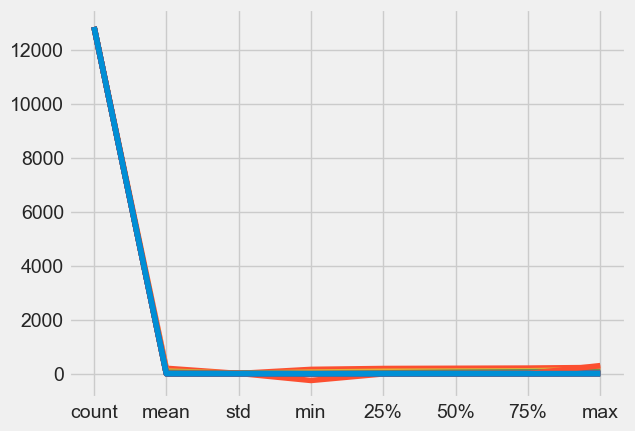

In [30]:
plt.plot(nba_data.describe())

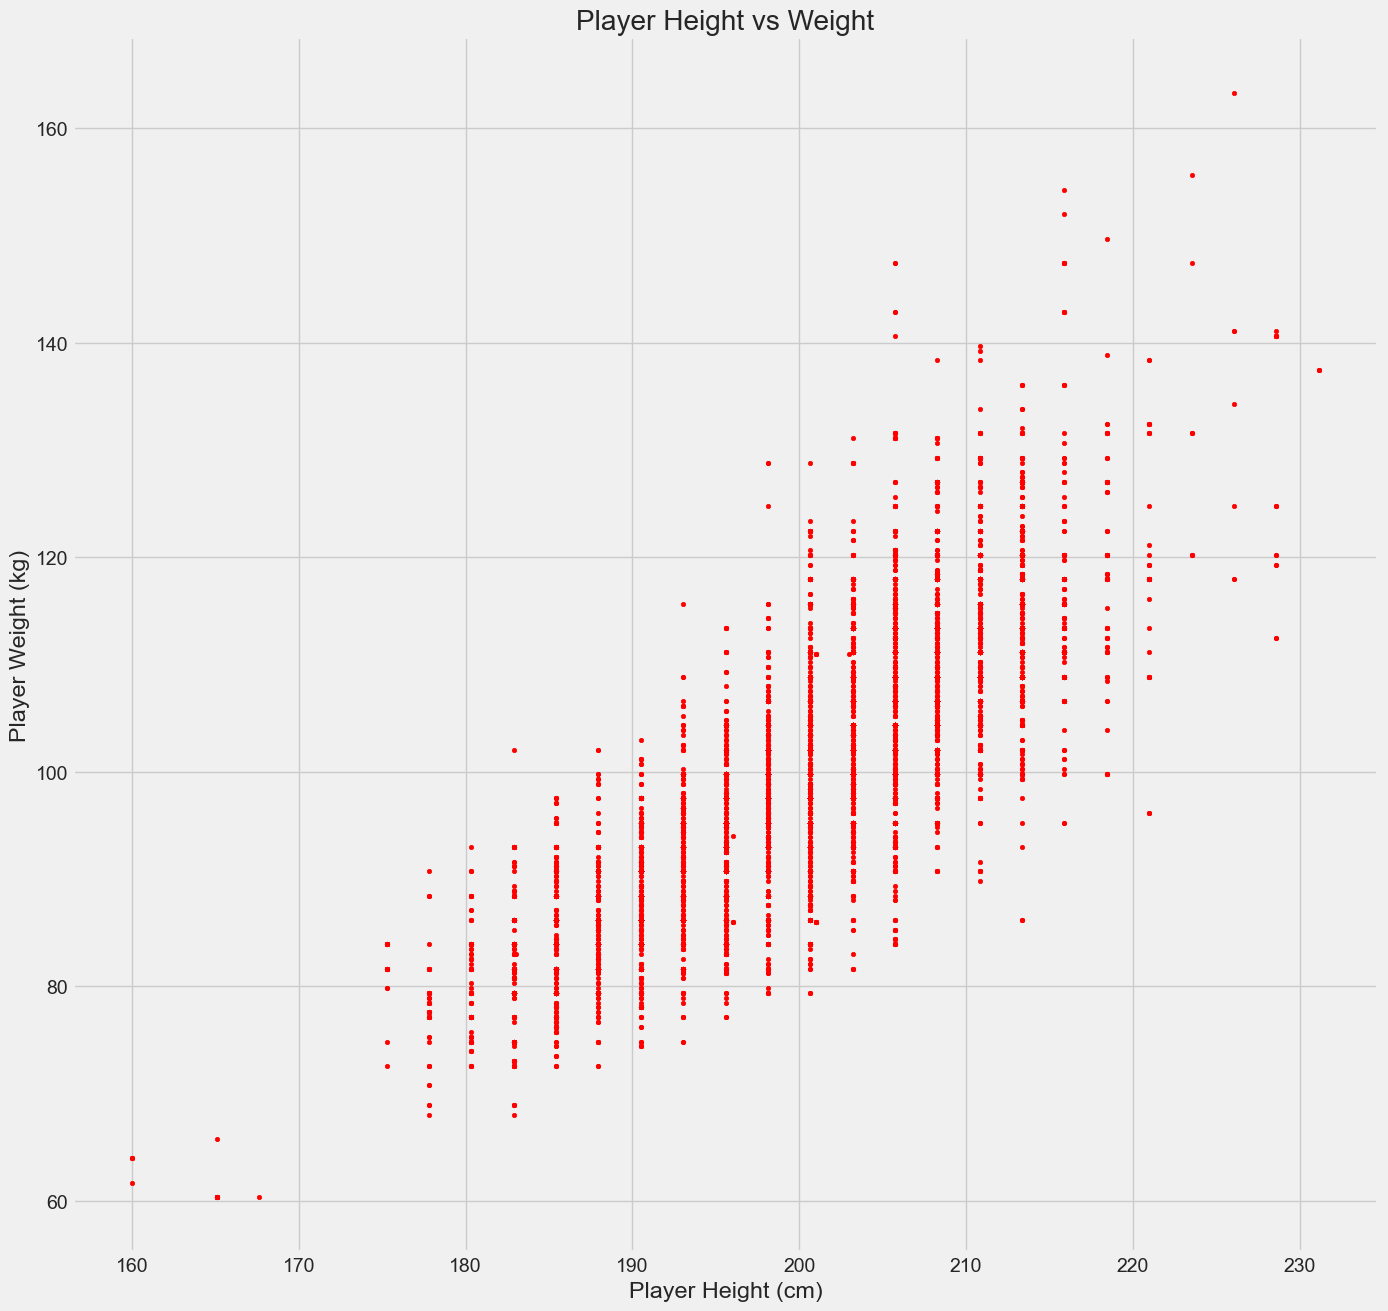

In [31]:
plt.figure(figsize=(15,15))
ax = plt.axes()

ax.scatter(nba_data.player_height, nba_data.player_weight,s=10,c='r')

ax.set(xlabel='Player Height (cm)',
       ylabel='Player Weight (kg)',
       title='Player Height vs Weight');

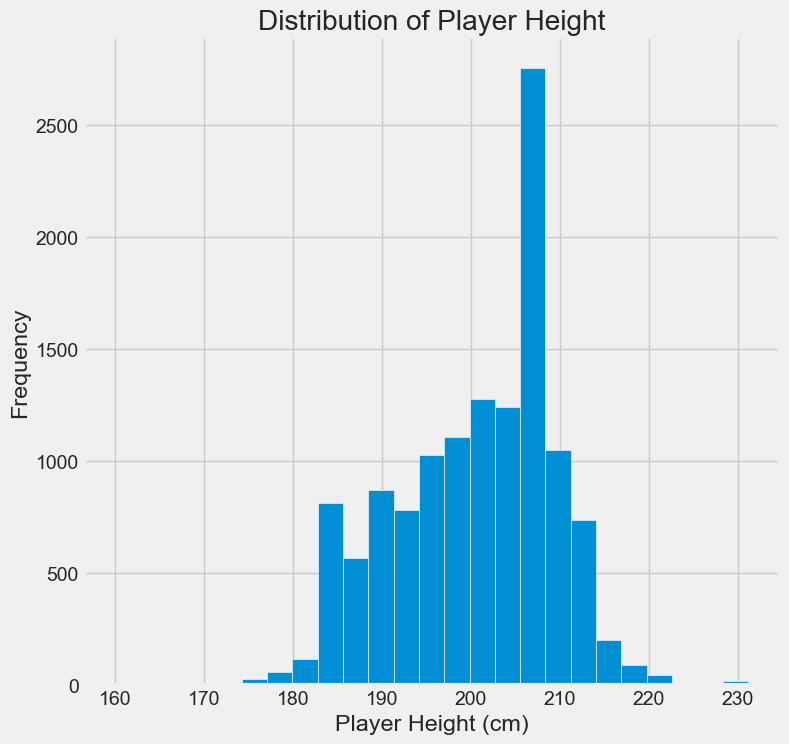

In [32]:
plt.figure(figsize=(8,8))
ax = plt.axes()
ax.hist(nba_data.player_height, bins=25);

ax.set(xlabel='Player Height (cm)', 
       ylabel='Frequency',
       title='Distribution of Player Height');

<Axes: >

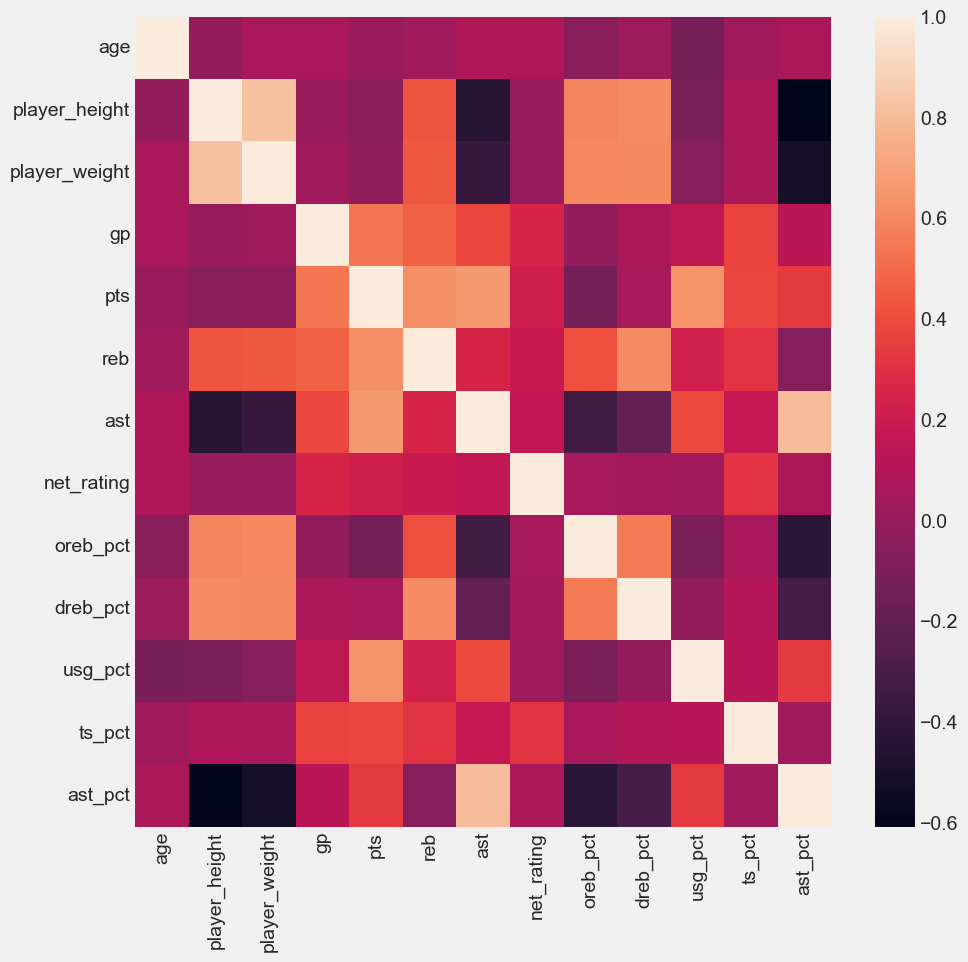

In [33]:
heatmap_data = nba_data[['age','player_height','player_weight','gp','pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct',
                        'ts_pct','ast_pct']]
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sea.heatmap(heatmap_data.corr())

In [34]:
heatmap_data.corr()

age  player_height  player_weight        gp       pts  \
age            1.000000      -0.007904       0.063561  0.057442  0.011353   
player_height -0.007904       1.000000       0.822141  0.004963 -0.055284   
player_weight  0.063561       0.822141       1.000000  0.022828 -0.025023   
gp             0.057442       0.004963       0.022828  1.000000  0.536003   
pts            0.011353      -0.055284      -0.025023  0.536003  1.000000   
reb            0.037386       0.424220       0.438112  0.471405  0.624509   
ast            0.092359      -0.442781      -0.371675  0.382726  0.664320   
net_rating     0.092896      -0.003074       0.003547  0.248412  0.215199   
oreb_pct      -0.055228       0.589538       0.599511 -0.014763 -0.125164   
dreb_pct       0.018774       0.614273       0.605639  0.067911  0.055669   
usg_pct       -0.113882      -0.104011      -0.065811  0.147248  0.641469   
ts_pct         0.025245       0.076797       0.070992  0.367876  0.373439   
ast_pct        0.069029      -0.608696      -0.521939  0.131720  0.337339   

                    reb       ast  net_rating  oreb_pct  dreb_pct   usg_pct  \
age            0.037386  0.092359    0.092896 -0.055228  0.018774 -0.113882   
player_height  0.424220 -0.442781   -0.003074  0.589538  0.614273 -0.104011   
player_weight  0.438112 -0.371675    0.003547  0.599511  0.605639 -0.065811   
gp             0.471405  0.382726    0.248412 -0.014763  0.067911  0.147248   
pts            0.624509  0.664320    0.215199 -0.125164  0.055669  0.641469   
reb            1.000000  0.247841    0.187820  0.407960  0.611899  0.232968   
ast            0.247841  1.000000    0.162865 -0.337970 -0.192146  0.396505   
net_rating     0.187820  0.162865    1.000000  0.055761  0.047928  0.026575   
oreb_pct       0.407960 -0.337970    0.055761  1.000000  0.555358 -0.100091   
dreb_pct       0.611899 -0.192146    0.047928  0.555358  1.000000 -0.007402   
usg_pct        0.232968  0.396505    0.026575 -0.100091 -0.007402  1.000000   
ts_pct         0.313451  0.174494    0.313251  0.060572  0.105150  0.119323   
ast_pct       -0.062654  0.803150    0.063809 -0.424056 -0.317477  0.339286   

                 ts_pct   ast_pct  
age            0.025245  0.069029  
player_height  0.076797 -0.608696  
player_weight  0.070992 -0.521939  
gp             0.367876  0.131720  
pts            0.373439  0.337339  
reb            0.313451 -0.062654  
ast            0.174494  0.803150  
net_rating     0.313251  0.063809  
oreb_pct       0.060572 -0.424056  
dreb_pct       0.105150 -0.317477  
usg_pct        0.119323  0.339286  
ts_pct         1.000000  0.022195  
ast_pct        0.022195  1.000000

In [35]:
player_height_column = nba_data[['player_height','country']]
player_height_column.groupby('country').mean()

player_height
country                      
Angola             206.375000
Argentina          199.333134
Australia          199.796400
Austria            214.811429
Bahamas            202.292857
...                       ...
Ukraine            210.255556
United Kingdom     203.305833
Uruguay            208.280000
Venezuela          198.120000
Yugoslavia         211.281818

[82 rows x 1 columns]

In [36]:
nba_data.duplicated(keep=False).sum()

0

In [37]:
data_phpw = nba_data.drop(['age','player_name','team_abbreviation','college','country','draft_year','draft_round','draft_number','season','gp','pts','reb','ast','net_rating','usg_pct','ts_pct','ast_pct','oreb_pct','dreb_pct'], axis=1)

In [38]:
data_phpw

player_height  player_weight
0             193.04      94.800728
1             190.50      86.182480
2             203.20     103.418976
3             203.20     102.058200
4             213.36     119.748288
...              ...            ...
12839         213.36     127.005760
12840         213.36      86.182480
12841         205.74     102.511792
12842         208.28     113.398000
12843         205.74     102.965384

[12844 rows x 2 columns]

In [39]:
data_phpw.corr()

player_height  player_weight
player_height       1.000000       0.822141
player_weight       0.822141       1.000000

In [40]:
X = data_phpw.iloc[:,1:].values
y = data_phpw.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None,)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')
regr = LinearRegression()
regr.fit(X_train, y_train)
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

X_train: (9633, 1)
X_test: (3211, 1)
y_train: (9633,)
y_test: (3211,)
Coefficient: [0.6016583]
Intercept: 140.2456945427599


In [41]:
y_pred = np.round(regr.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4.100202429149798
Residual Sum of Squares(MSE): 26.758461195889133
R2-Score: 0.6841440089263782


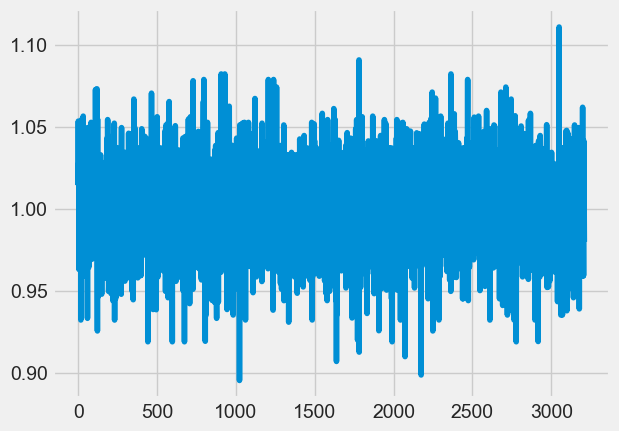

In [42]:
ratio1 = y_test / y_pred
plt.plot(ratio1)

In [43]:
data_pady = nba_data.drop(['player_height','player_name','team_abbreviation','college','country','player_weight','draft_round','draft_number','season','gp','pts','reb','ast','net_rating','usg_pct','ts_pct','ast_pct','oreb_pct','dreb_pct'], axis=1)

In [44]:
data_pady

age draft_year
0      22.0       1996
1      28.0       1994
2      26.0       1993
3      30.0       1989
4      23.0       1995
...     ...        ...
12839  29.0       2014
12840  20.0  Undrafted
12841  25.0       2017
12842  24.0       2021
12843  33.0  Undrafted

[12844 rows x 2 columns]

In [45]:
to_drop = data_pady[((data_pady.draft_year == 'Undrafted'))].index
new_data_pady= data_pady.drop(to_drop)

In [46]:
new_data_pady.head(40)

age draft_year
0   22.0       1996
1   28.0       1994
2   26.0       1993
3   30.0       1989
4   23.0       1995
5   33.0       1985
6   26.0       1993
7   30.0       1989
8   24.0       1994
9   24.0       1994
10  22.0       1995
11  31.0       1988
12  29.0       1991
13  33.0       1986
14  28.0       1990
15  26.0       1993
16  25.0       1994
17  24.0       1995
18  34.0       1984
19  31.0       1988
20  31.0       1989
21  33.0       1987
22  28.0       1990
23  32.0       1988
24  36.0       1982
25  29.0       1992
26  28.0       1991
27  27.0       1992
28  27.0       1992
30  34.0       1983
31  31.0       1988
32  27.0       1994
33  25.0       1994
34  29.0       1991
35  26.0       1994
36  24.0       1995
37  24.0       1995
38  21.0       1996
40  29.0       1993
42  29.0       1990

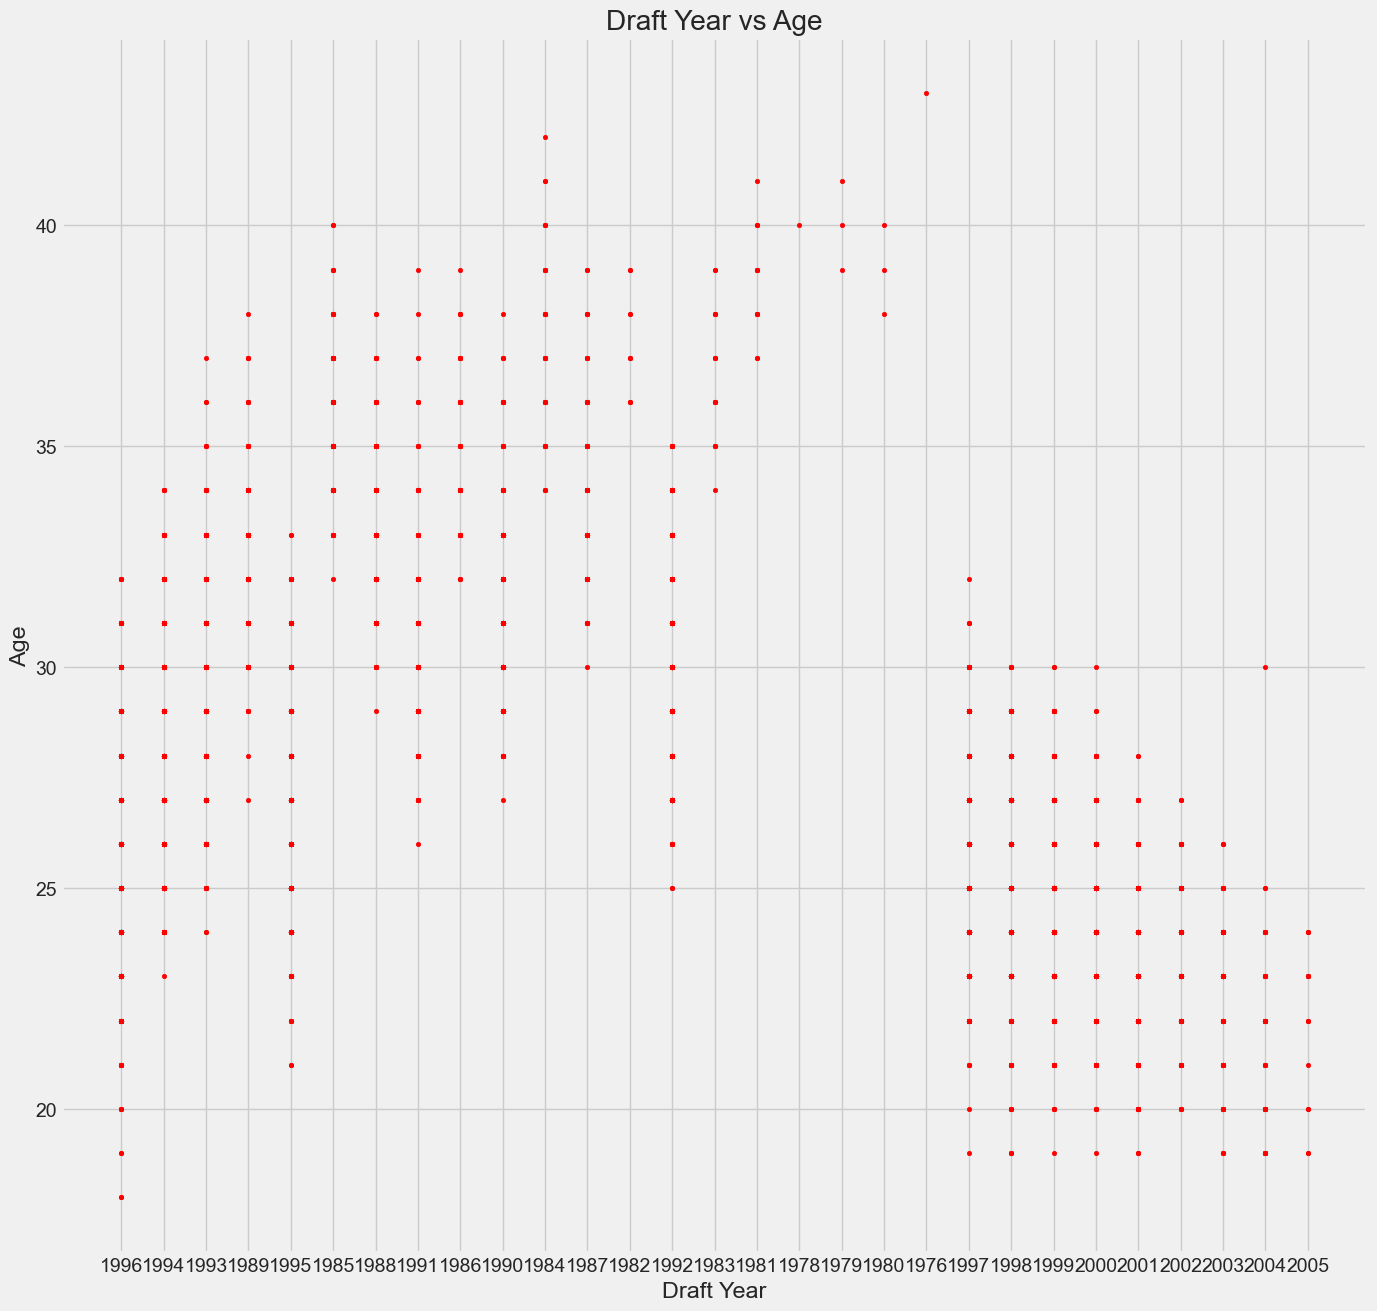

In [47]:
dummy_relation = new_data_pady.head(3500)
plt.figure(figsize=(15,15))
ax = plt.axes()

ax.scatter(dummy_relation.draft_year, dummy_relation.age,s=10,c='r')

ax.set(xlabel='Draft Year',
       ylabel='Age',
       title='Draft Year vs Age');

In [48]:
new_data_pady.corr()

age  draft_year
age         1.000000   -0.559036
draft_year -0.559036    1.000000

In [49]:
A = new_data_pady.iloc[:,1:].values
b = new_data_pady.iloc[:,0].values
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.25, random_state=None,)
print(f'A_train: {A_train.shape}\nA_test: {A_test.shape}\nb_train: {b_train.shape}\nb_test: {b_test.shape}')
regr = LinearRegression()
regr.fit(A_train, b_train)
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

A_train: (7864, 1)
A_test: (2622, 1)
b_train: (7864,)
b_test: (2622,)
Coefficient: [-0.27782292]
Intercept: 583.8160115575204


In [50]:
b_pred = np.round(regr.predict(A_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(b_test, b_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(b_test, b_pred)}')
print(f'R2-Score: {metrics.r2_score(b_test, b_pred)}')

Mean Absolute Error(MAE): 3.0173493516399694
Residual Sum of Squares(MSE): 13.966080282227308
R2-Score: 0.3095171642064961


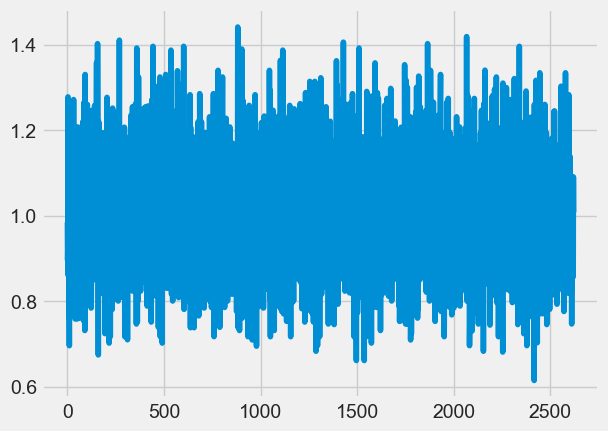

In [51]:
ratio2 = b_test / b_pred
plt.plot(ratio2)

In [52]:
datx =nba_data.drop(['oreb_pct','age','player_name','team_abbreviation','college','country','draft_year','draft_round','draft_number','season','gp','pts','reb','ast','net_rating','usg_pct','ts_pct','ast_pct'], axis=1)

In [53]:
datx

player_height  player_weight  dreb_pct
0             193.04      94.800728     0.071
1             190.50      86.182480     0.111
2             203.20     103.418976     0.185
3             203.20     102.058200     0.111
4             213.36     119.748288     0.169
...              ...            ...       ...
12839         213.36     127.005760     0.243
12840         213.36      86.182480     0.065
12841         205.74     102.511792     0.180
12842         208.28     113.398000     0.175
12843         205.74     102.965384     0.164

[12844 rows x 3 columns]

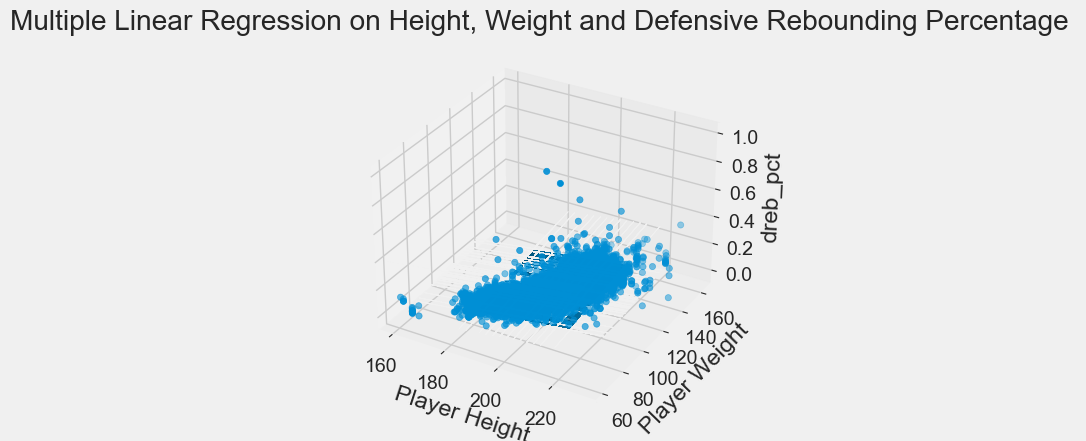

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = datx['player_height']
y = datx['player_weight']
z = datx['dreb_pct']

ax.scatter(x, y, z)

A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

ax.set_xlabel('Player Height')
ax.set_ylabel('Player Weight')
ax.set_zlabel('dreb_pct')
plt.title('Multiple Linear Regression on Height, Weight and Defensive Rebounding Percentage ')

plt.show()

Comparing Height, Weight and Defensive Rebounding Percentage¶
Let's check if it is correct to say that players with higher height have good defense advantage.

dreb_pct -> Defensive Rebounding Percentage Definition. The percentage of available defensive rebounds a player or team obtains while on the floor.

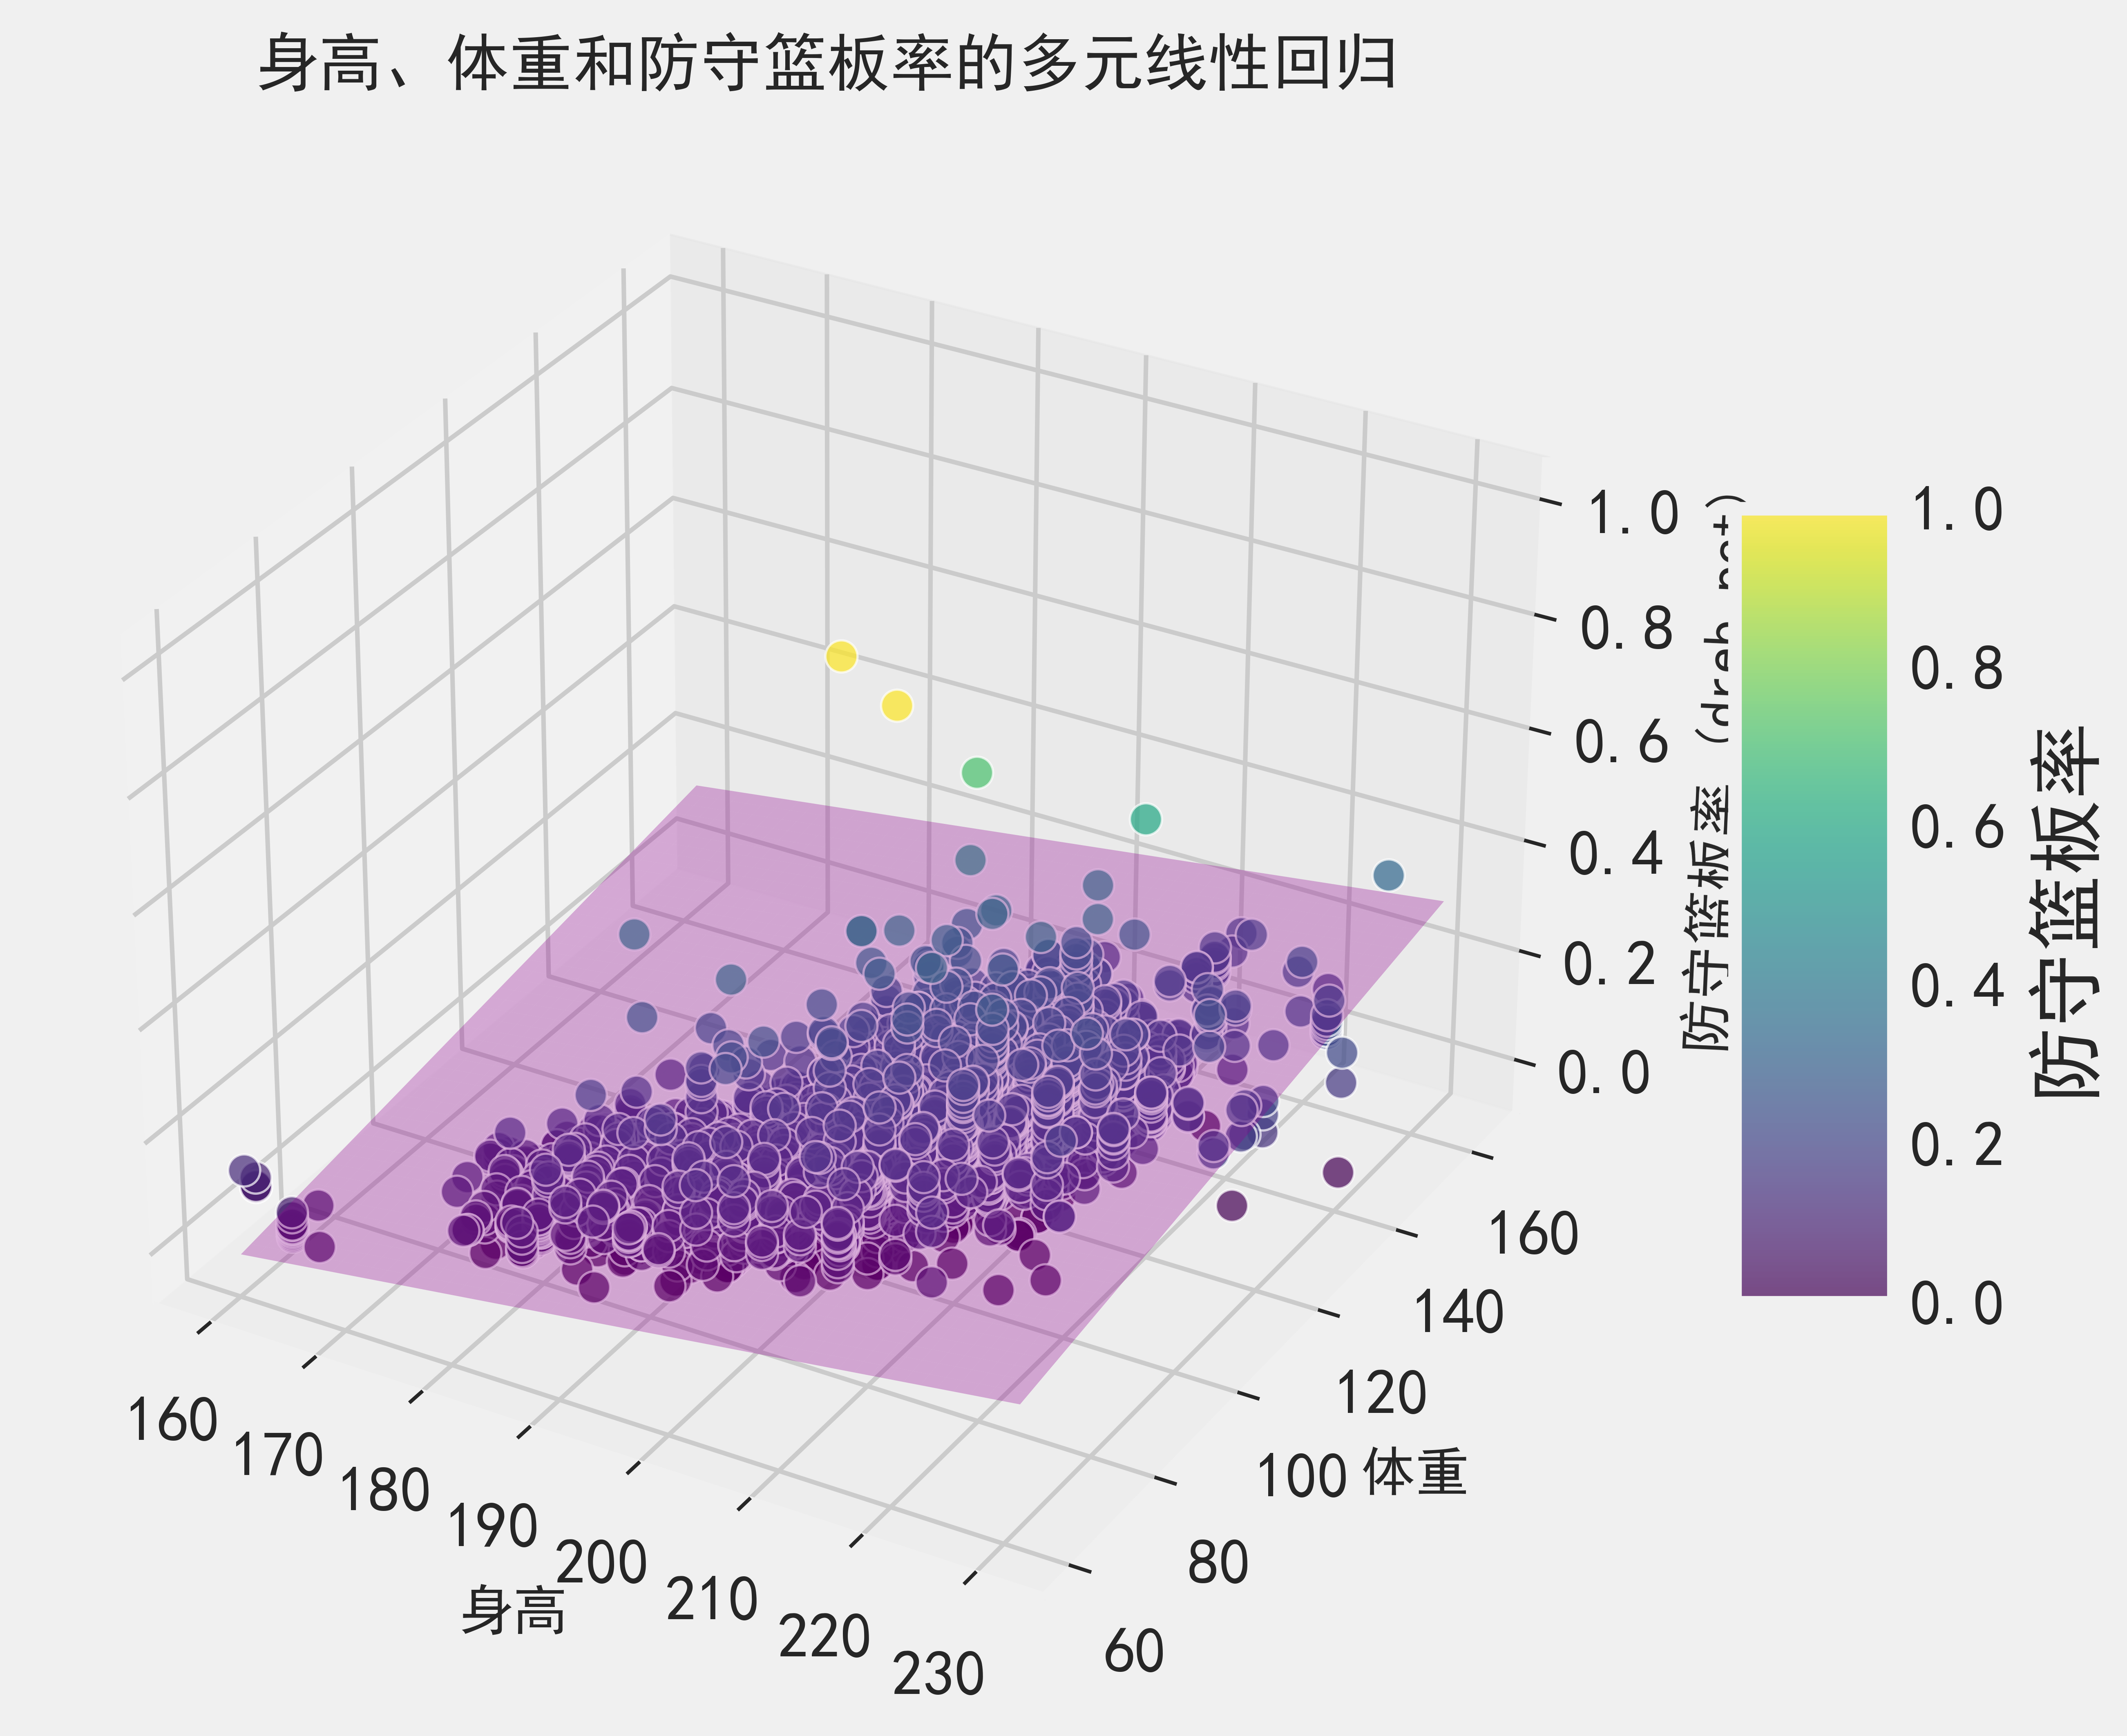

In [65]:
fig = plt.figure(figsize=(8, 6), dpi=800)  # 增加图表尺寸和DPI
ax = fig.add_subplot(111, projection='3d')

x = datx['player_height']
y = datx['player_weight']
z = datx['dreb_pct']

# 散点图，调整点大小和透明度
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50, edgecolors='w', alpha=0.7)

# 添加颜色条
cbar = plt.colorbar(scatter, shrink=0.5, aspect=5)
cbar.set_label('防守篮板率')

# 拟合平面
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# 为了创建网格，需要使用范围更广的x和y
x_surf = np.linspace(x.min(), x.max(), 50)
y_surf = np.linspace(y.min(), y.max(), 50)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = plane_coef[0] * x_surf + plane_coef[1] * y_surf + plane_coef[2]

# 绘制拟合平面，调整透明度和颜色映射
ax.plot_surface(x_surf, y_surf, z_surf, color='m', alpha=0.3, edgecolor='none')

# 设置轴标签和标题
ax.set_xlabel('身高', fontsize=12)
ax.set_ylabel('体重', fontsize=12)
ax.set_zlabel('防守篮板率 (dreb_pct)', fontsize=12)
plt.title('身高、体重和防守篮板率的多元线性回归', fontsize=14)

# 显示图表
plt.show()